<H1 align="center">  Key Indicators of Customer Satisfaction for Android Devices </H1>

---

The dataset was obtained from Kaggle at https://www.kaggle.com/datasets/shreyaspj/android-devices-and-mobiles/data. According to the author, the dataset was scrapped online from the e-commerce website Flipkart. It consists of the **market performance metrics** (price, rating, and reviews) and various **device specifications** (battery, camera, display etc) of 984 android devices sold on the website. 

This analysis provides insights into how various factors, including price and specifications, influence customer satisfaction. However, the dataset only includes products listed on Flipkart and may not represent the entire Android market. Before analysis, the dataset underwent wrangling to remove inconsistencies and to fine tune the information contained in each column. 

Since the dataset lacks a direct "customer satisfaction" variable, ratings conditioned on a significant number of reviews was chosen as a proxy metric. Justification for the chosen metric through theoretical knowledge and data evidence is provided. 

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [32]:
df = pd.read_csv("mobiles1.csv")
df.head()

,battery,camera,display,memory,name,price,processor,rating,reviews,warranty
0,5000 mAh Battery,12MP + 2MP | 8MP Front Camera,15.8 cm (6.22 inch) HD+ Display,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,"Redmi 8 (Ruby Red, 64 GB)",9999,Qualcomm Snapdragon 439 Processor,4.4,"55,078 Reviews",Brand Warranty of 1 Year Available for Mobile ...
1,5000 mAh Battery,12MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 64 GB ROM,"Realme 5i (Aqua Blue, 64 GB)",10999,Qualcomm Snapdragon 665 2 GHz Processor,4.5,"20,062 Reviews",Sunrise Design
2,5000 mAh Battery,12MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 128 GB ROM,"Realme 5i (Aqua Blue, 128 GB)",11999,Qualcomm Snapdragon 665 (2 GHz) Processor,4.5,"20,062 Reviews",Sunrise Design
3,5000 mAh Battery,12MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 128 GB ROM,"Realme 5i (Forest Green, 128 GB)",11999,Qualcomm Snapdragon 665 (2 GHz) Processor,4.5,"20,062 Reviews",Sunrise Design
4,4000 mAh Battery,13MP + 2MP | 5MP Front Camera,15.49 cm (6.1 inch) HD+ Display,3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,"Realme C2 (Diamond Blue, 32 GB)",7499,MediaTek P22 Octa Core 2.0 GHz Processor,4.4,"10,091 Reviews",Dual Nano SIM slots and Memory Card Slot


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   battery    984 non-null    object 
 1   camera     984 non-null    object 
 2   display    984 non-null    object 
 3   memory     984 non-null    object 
 4   name       984 non-null    object 
 5   price      984 non-null    int64  
 6   processor  983 non-null    object 
 7   rating     971 non-null    float64
 8   reviews    971 non-null    object 
 9   warranty   836 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 77.0+ KB


####

## **🧹 1 Data Wrangling** 

### **1.1 Removing missing values and anomalies**

First, we find out if there are missing values in the data. We remove the rows containing missing values then recalculate the missing count and number of rows remaining to double check.

In [34]:
# obtain the number of missing data points per column
missing_values_count = df.isnull().sum()
missing_values_count[:]

battery        0
camera         0
display        0
memory         0
name           0
price          0
processor      1
rating        13
reviews       13
warranty     148
dtype: int64

In [35]:
df = df.dropna()

# Recalculate missing values count
missing_values_count = df.isnull().sum()
print(missing_values_count)

# Double check number of rows remaining 
print()
print(df.shape[0])

battery      0
camera       0
display      0
memory       0
name         0
price        0
processor    0
rating       0
reviews      0
warranty     0
dtype: int64

828


The warranty column contains many anomalies (see first 15 rows below). A Google search on Flipkart suggests the author made an error during web scraping, as many of the odd values in the column likely belonged to the **highlights** section of the devices instead. 

For one of many examples, see **highlights** section for the device *realme C2 (Diamond Blue, 32 GB)* at its Flipkart store page: https://shorturl.at/1TMgr. One of the device's highlights were *Dual Nano SIM slots and Memory Card Slot*, which was its input for the warranty column.

Unfortunately, there are far too many such errors so the warranty column will be dropped. 

In [36]:
# First 15 rows of warranty
df["warranty"].head(15)

0     Brand Warranty of 1 Year Available for Mobile ...
1                                        Sunrise Design
2                                        Sunrise Design
3                                        Sunrise Design
4              Dual Nano SIM slots and Memory Card Slot
5              Dual Nano SIM slots and Memory Card Slot
6              Dual Nano SIM slots and Memory Card Slot
7              Dual Nano SIM slots and Memory Card Slot
8                                        Sunrise Design
9              Dual Nano SIM slots and Memory Card Slot
10    Brand Warranty of 1 Year Available for Mobile ...
11    Brand Warranty of 1 Year Available for Mobile ...
12                                   18 W Fast Charging
13    Brand Warranty of 1 Year Available for Mobile ...
14    Brand Warranty of 1 Year Available for Mobile ...
Name: warranty, dtype: object

In [37]:
# Drop warranty column
df = df.drop(columns=["warranty"])

# Display first 5 rows to confirm column has been removed
df.head()

,battery,camera,display,memory,name,price,processor,rating,reviews
0,5000 mAh Battery,12MP + 2MP | 8MP Front Camera,15.8 cm (6.22 inch) HD+ Display,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,"Redmi 8 (Ruby Red, 64 GB)",9999,Qualcomm Snapdragon 439 Processor,4.4,"55,078 Reviews"
1,5000 mAh Battery,12MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 64 GB ROM,"Realme 5i (Aqua Blue, 64 GB)",10999,Qualcomm Snapdragon 665 2 GHz Processor,4.5,"20,062 Reviews"
2,5000 mAh Battery,12MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 128 GB ROM,"Realme 5i (Aqua Blue, 128 GB)",11999,Qualcomm Snapdragon 665 (2 GHz) Processor,4.5,"20,062 Reviews"
3,5000 mAh Battery,12MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 128 GB ROM,"Realme 5i (Forest Green, 128 GB)",11999,Qualcomm Snapdragon 665 (2 GHz) Processor,4.5,"20,062 Reviews"
4,4000 mAh Battery,13MP + 2MP | 5MP Front Camera,15.49 cm (6.1 inch) HD+ Display,3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,"Realme C2 (Diamond Blue, 32 GB)",7499,MediaTek P22 Octa Core 2.0 GHz Processor,4.4,"10,091 Reviews"


### **1.2 Separating multi-attribute columns and grouping similar categories**
Many columns seem to contain multiple pieces of information. For example, the name column includes the **model** (e.g., Redmi 8), the **colour** (e.g., Ruby Red) and the **ROM size** (e.g., 64GB); such attributes could be systematically separated into distinct columns for better clarity and analysis.

#### Battery

The battery type labels are inconsistent, with variations like Li-Ion and Li-Ion Polymer likely referring to the same technology within the data set. While these are technically distinct technologies, most modern smartphones use Li-Ion Polymer, making the distinction less meaningful in this context. Additionally, it is reasonable to assume that battery capacity is the primary factor consumers consider, whereas battery type has minimal impact on purchasing decisions. Therefore, **only battery capacity is retained for analysis**, while the ambiguous battery type will be dropped.

In [38]:
# Function to extract battery capacity (in mAh)
def extract_capacity(value):
    match = re.search(r"(\d+)\s*mAh", str(value))
    return int(match.group(1)) if match else None

# Create new column for battery capacity
df["Battery_Capacity (mAh)"] = df["battery"].apply(extract_capacity)
df["Battery_Capacity (mAh)"] = df["Battery_Capacity (mAh)"].astype("Int64")

# Drop the original battery column
df = df.drop(columns=["battery"])

df[["Battery_Capacity (mAh)"]].head(10)

,Battery_Capacity (mAh)
0,5000
1,5000
2,5000
3,5000
4,4000
5,4000
6,4000
7,4000
8,5000
9,4000


#### Camera

The camera column contains 4 pieces of information: number of lenses in back camera, number of megapixels for each lense in back camera, number of lenses in front camera, and number of megapixels for each lense in front camera. For ease of analysis, only the highest megapixels count will be extracted for both the front and back camera. 

**Note:** There are certain inputs like "*48MP + 8MP | 48MP(F2.0) + 8MP(Ultra Wide/F2.2) + TOF (Time-of-Flight) 3D-Depth Rotating Camera*" which includes additonal description beyond the number of lenses and megapixels. The approach taken is to ignore these extra descriptions since there were only a few of them.

In [39]:
def extract_camera_info(camera_str):
    # Split into back and front camera using '|'
    parts = camera_str.split('|')
    
    back_camera = parts[0].strip()  # First part is back camera
    front_camera = parts[1].strip() if len(parts) > 1 else ""  # Second part is front camera if available

    # Function to extract highest megapixel count and number of lenses
    def get_camera_details(camera_text):
        # Find all occurrences of megapixels (e.g., 48MP, 8MP)
        megapixels = [int(mp) for mp in re.findall(r'(\d+)MP', camera_text)]
        highest_mp = max(megapixels) if megapixels else None  # Get the highest MP
        
        # Count the number of lenses (based on number of plus signs)
        num_lenses = camera_text.count('+') + 1 if '+' in camera_text else 1
        
        return highest_mp, num_lenses

    # Extract details
    back_mp, back_lenses = get_camera_details(back_camera)
    front_mp, front_lenses = get_camera_details(front_camera)

    return back_mp, back_lenses, front_mp, front_lenses

df[['Back_Camera_MP', 'Back_Camera_No._Lenses', 'Front_Camera_MP','Front_Camera_No._Lenses']] = df['camera'].apply(
    lambda x: pd.Series(extract_camera_info(str(x)))
)
df["Back_Camera_MP"] = df["Back_Camera_MP"].astype("Int64")
df["Back_Camera_No._Lenses"] = df["Back_Camera_No._Lenses"].astype("Int64")
df["Front_Camera_MP"] = df["Front_Camera_MP"].astype("Int64")
df["Front_Camera_No._Lenses"] = df["Front_Camera_No._Lenses"].astype("Int64")

df = df.drop(columns=["camera"])

df[['Back_Camera_MP', 'Back_Camera_No._Lenses', 'Front_Camera_MP','Front_Camera_No._Lenses']].head()

,Back_Camera_MP,Back_Camera_No._Lenses,Front_Camera_MP,Front_Camera_No._Lenses
0,12,2,8,1
1,12,4,8,1
2,12,4,8,1
3,12,4,8,1
4,13,2,5,1


#### Display

The display column contains 2 pieces of information: display size (in both cm and inches) and display resolution. Display size will only be kept in inches once extracted. 
Display resolution consists of 4 main types: HD, HD+, Full HD, and Full HD+. Any other resolutions will be classified as "unspecified"

**Note:** Similarly to the camera column, there are certain inputs which include additonal descriptions beyond the display resolution. These will be classified as "unspecified"

In [40]:
def extract_display_info(display_str):
    """Extract display size (in inches) and resolution type (HD+, HD, Full HD+, Full HD, Unspecified)."""
    display_size = None
    resolution = "Unspecified"  # Default value

    # Extract display size (e.g., 6.5 inch, 6.7", etc.)
    size_match = re.search(r'(\d+(\.\d+)?)\s*(inch|")', display_str, re.IGNORECASE)
    if size_match:
        display_size = float(size_match.group(1))  # Convert to float

    # Extract resolution type
    if re.search(r'full\s*hd\+', display_str, re.IGNORECASE):
        resolution = "Full HD+"
    elif re.search(r'full\s*hd', display_str, re.IGNORECASE):
        resolution = "Full HD"
    elif re.search(r'hd\+', display_str, re.IGNORECASE):
        resolution = "HD+"
    elif re.search(r'\bhd\b', display_str, re.IGNORECASE):  # Ensure "HD" is a separate word
        resolution = "HD"

    return display_size, resolution

# Apply function to extract display details
df[['Display_Size_(inches)', 'Resolution']] = df['display'].apply(
    lambda x: pd.Series(extract_display_info(str(x)))
)

df = df.drop(columns=["display"])

df[['Display_Size_(inches)', 'Resolution']].head()

,Display_Size_(inches),Resolution
0,6.22,HD+
1,6.52,HD+
2,6.52,HD+
3,6.52,HD+
4,6.10,HD+


#### Memory

The memory column consists of 3 pieces of information: RAM capacity, ROM capacity, and the maximum storage capacity that can be expanded. For ease of analysis, the maximum expandable storage capacity will simply be extracted as a boolean variable indicating whether expansion is possible; the size of the expansion will not be considered. 

In [41]:
# Function to extract RAM, ROM, and Expandable Storage (Boolean)
def extract_memory_features(memory_str):
    ram_match = re.search(r'(\d+)\s*GB\s*RAM', memory_str, re.IGNORECASE)
    rom_match = re.search(r'(\d+)\s*GB\s*ROM', memory_str, re.IGNORECASE)
    expandable_match = re.search(r'Expandable', memory_str, re.IGNORECASE)

    ram = int(ram_match.group(1)) if ram_match else None
    rom = int(rom_match.group(1)) if rom_match else None
    expandable = bool(expandable_match)  # Converts to True if found, otherwise False

    return pd.Series([ram, rom, expandable])

# Apply function to extract values
df[['RAM_Capacity_(GB)', 'ROM_Capacity_(GB)', 'ROM_Expandable']] = df['memory'].apply(extract_memory_features)

df["RAM_Capacity_(GB)"] = df["RAM_Capacity_(GB)"].astype("Int64")
df["ROM_Capacity_(GB)"] = df["ROM_Capacity_(GB)"].astype("Int64")
df["ROM_Expandable"] = df["ROM_Expandable"].astype(bool)  

df = df.drop(columns=['memory'])

df[['RAM_Capacity_(GB)', 'ROM_Capacity_(GB)', 'ROM_Expandable']].head()

,RAM_Capacity_(GB),ROM_Capacity_(GB),ROM_Expandable
0,4,64,True
1,4,64,False
2,4,128,False
3,4,128,False
4,3,32,True


#### Name

The name column consists of 3 pieces of information: brand, colour, and ROM capacity. ROM capacity is exactly the same as that extracted for the memory column so it will be ignored here. As for brand, only the main brand name will be extracted, ie Realme C2 -> Real me and Vivo x5 -> Vivo. This eases analyses but risks losing information since customers could very well purchase based on a specific model. Therefore, the original name column will not be dropped, only renamed to "Name" (capitalised) for consistency. 

Colour will be simplified where many similar colours will be categorised under one main colour, ie lunar white, eclipse white and so white will all be categorised under white. This is tricky however, as some colours like starry night, black&grey, and black&blue are difficult to classify unless hard coded into the function. This method is bound to miss some colours, so they will be classified as unknown colours. The method will be considered good enough if the number of unknown colours remains low after extraction.

In [42]:
def extract_brand_color(name):
    words = name.split()  
    brand = words[0]  # First word is the brand name

    # Regex to find color (assuming color is mentioned after the brand and model name)
    color_match = re.search(r'(black|blue|red|green|white|gold|silver|gray|grey|pink|purple|yellow|orange|brown|aqua|teal|lavender|bronze|champagne|midnight|starlight)', 
                            name, re.IGNORECASE)
    color = color_match.group(0).lower() if color_match else "unknown"
    
    return pd.Series([brand, color])

# Apply function to extract values
df[['Brand', 'Color']] = df['name'].apply(extract_brand_color)

# Standardize color names (grouping similar ones)
color_mapping = {
    "grey": "gray", "lavender": "purple", "champagne": "gold", "midnight": "black",
    "starlight": "white", "aqua": "blue", "teal": "blue", "bronze": "brown"
}
df["Color"] = df["Color"].replace(color_mapping)

df = df.rename(columns={"name": "Name"})

unknown_count = df[df['Color'] == "unknown"].shape[0]
print(f"Number of unknown colours: {unknown_count}")

unique_colors = df["Color"].unique()
print(f"Possible colour categories: {unique_colors}")

df[['Brand', 'Color']].head()

Number of unknown colours: 45
Possible colour categories: ['red' 'blue' 'green' 'black' 'unknown' 'gray' 'white' 'purple' 'gold'
 'silver' 'orange' 'yellow' 'pink']


,Brand,Color
0,Redmi,red
1,Realme,blue
2,Realme,blue
3,Realme,green
4,Realme,blue


#### Processor and Reviews

The processor and reviews column only requires simplification. Each of the values in the processor column consists of the processor name followed by the word "processor"; only the names will be extracted for simplification. Similarly, each of the values in the reviews column consists of the number of reviews followed by the word "reviews"; only the number of reviews will be extracted and the column name will be renamed to "Number_of_Reviews".

In [43]:
def extract_processor_name(text):
    match = re.search(r'^(.*?)\s*Processor', text, re.IGNORECASE)
    return match.group(1).strip() if match else None

df["Processor"] = df["processor"].apply(extract_processor_name)

# Function to extract and clean the number of reviews
def extract_review_count(text):
    match = re.search(r'([\d,]+)\s*Reviews?', str(text), re.IGNORECASE)  # Extracts numeric value before "Reviews"
    return int(match.group(1).replace(',', '')) if match else None  # Remove commas and convert to int

# Apply function and rename column
df["Number_of_Reviews"] = df["reviews"].apply(extract_review_count)

# Convert to Int64 type (supports NaN values)
df["Number_of_Reviews"] = df["Number_of_Reviews"].astype("Int64")

df = df.drop(columns=['processor'])
df = df.drop(columns=['reviews'])

print(df[["Processor"]].head())
print()
print(df[["Number_of_Reviews"]].head())

                         Processor
0          Qualcomm Snapdragon 439
1    Qualcomm Snapdragon 665 2 GHz
2  Qualcomm Snapdragon 665 (2 GHz)
3  Qualcomm Snapdragon 665 (2 GHz)
4   MediaTek P22 Octa Core 2.0 GHz

   Number_of_Reviews
0              55078
1              20062
2              20062
3              20062
4              10091


#### Price and Rating

The price and rating columns do not require modifications but will be capitalised for consistency. 

In [44]:
df = df.rename(columns={"price": "Price", "rating": "Rating"})

The final data set is as follows: 

df.head()

In [45]:
df.infO()

AttributeError: 'DataFrame' object has no attribute 'infO'

## **📊2 Exploratory Data Analysis** 

### **Identifying Main Metric of Customer Satisfaction**
Since the dataset lacks a direct "customer satisfaction" variable, a proxy metric must be identified. Ratings naturally serve as a strong candidate, as they represent direct user feedback. However, for ratings to be a reliable metric, their stability and accuracy within the dataset must first be evaluated.

A key issue with using rating alone is its high variability when the number of reviews is low. A product with a small number of high ratings is not necessarily good—early reviews may be biased or unrepresentative. On the other hand, when a product accumulates a large number of reviews, the average rating is more trustworthy and reflective of actual customer sentiment.

An initial scatterplot of rating vs. number of reviews suggests a likely non-linear relationship, prompting a log-transformation of review count to better capture the trend.

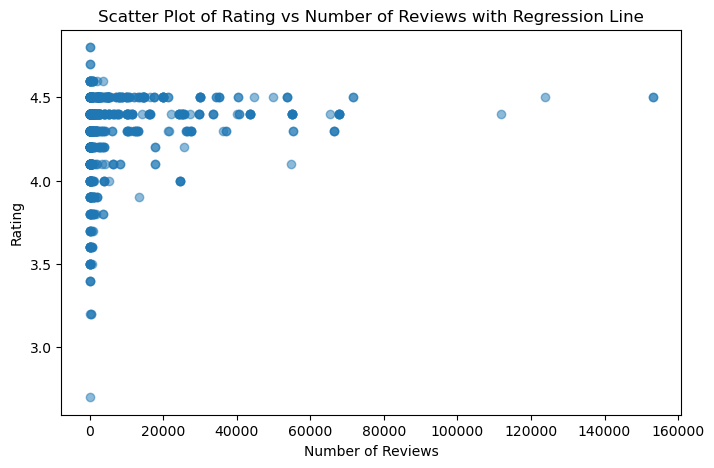

In [ ]:
df["Number_of_Reviews"] = df["Number_of_Reviews"].astype("int64")

x = df["Number_of_Reviews"].to_numpy()
y = df["Rating"].to_numpy()

plt.figure(figsize=(8, 5))
sns.regplot(x=x, y=y, scatter_kws={'alpha': 0.5}, fit_reg=False)

# Labels and title
plt.xlabel("Number of Reviews")
plt.ylabel("Rating")
plt.title("Scatter Plot of Rating vs Number of Reviews")

plt.show()

Post-log transformation, the relationship between rating and log(number of reviews) appears more linear. 

Heteroscedasticity is observed, meaning rating varies less as the number of reviews increases. Unlike typical cases where heteroscedasticity indicates an issue, in this context, it is a desirable and expected feature - as the number of reviews increases, ratings stabilize around a product's true accurate quality.

This suggests a refinement of the metric. Instead of using ratings alone, the analysis will focus on **ratings <u>conditioned</u> on a significant number of reviews**. Ratings alone can be misleading when review counts are low due to high variance, while number of reviews alone is insufficient since a large number of reviews does not necessarily imply a high-quality product. Thus, a combination of high ratings and a significant review count will serve as the main indicator of customer satisfaction.

**Important consideration:** A positive correlation is observed in the plot between rating and log(number of reviews). However, this does not imply that more reviews inherently lead to higher ratings. A poor-quality product will see its rating decline as more reviews accumulate, while a well-received product will maintain or improve its score. Thus, the relationship reflects a selection effect, where successful products tend to attract more reviews over time. It reflects the way customers naturally interact with ratings and how volume of reviews evolves over time.

In [ ]:
df['Log_Reviews'] = np.log1p(df['Number_of_Reviews'])

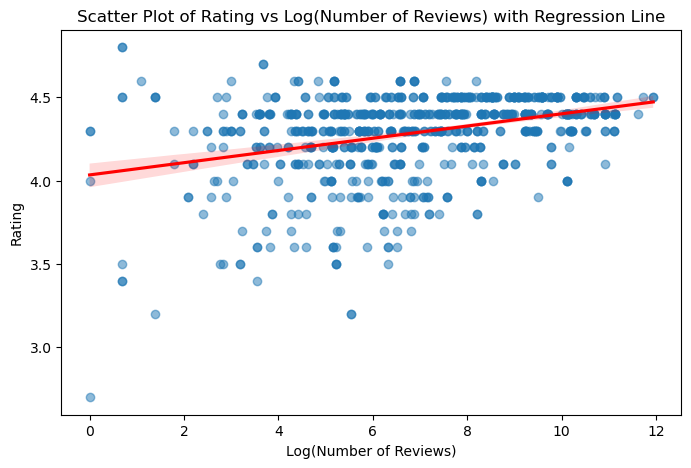

In [ ]:
df["Log_Reviews"] = df["Log_Reviews"].astype("float64")

x = df["Log_Reviews"].to_numpy()
y = df["Rating"].to_numpy()

# Scatter plot with regression line
plt.figure(figsize=(8, 5))
sns.regplot(x=x, y=y, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})

# Labels and title
plt.xlabel("Log(Number of Reviews)")
plt.ylabel("Rating")
plt.title("Scatter Plot of Rating vs Log(Number of Reviews)")

plt.show()

The residual plot of the regression is included here for completion

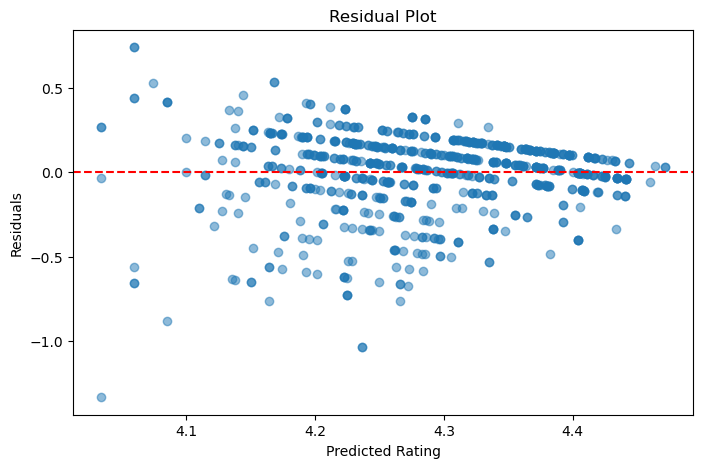

In [ ]:
# Prepare data
X = df[['Log_Reviews']].values  # Scikit-learn requires 2D array for X
y = df['Rating'].values

# Fit model
model = LinearRegression()
model.fit(X, y)

# Get predictions and residuals
df["Predicted"] = model.predict(X)
df["Residuals"] = df["Rating"] - df["Predicted"]

plt.figure(figsize=(8, 5))
plt.scatter(df["Predicted"], df["Residuals"], alpha=0.5)
plt.axhline(y=0, color="red", linestyle="dashed")  # Reference line at y=0

plt.xlabel("Predicted Rating")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

We have defined a robust indicator of customer satisfaction. 

Using this as our foundation, we can now explore how other factors like price, device specifications etc, relate to customer satisfaction.